# DATA 11800  Fall 2022
# Homework 5: Probability, Sampling and Joins (50 points)

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the needed functions. Each time you start your server, you will need to execute this cell again to load them. 


Homework 5 is due on **Thursday, November 3, at 9:00am**. Late work will not be accepted.  

In [1]:
# Don't change this cell; just run it. 
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter('ignore', FutureWarning)

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# causes_of_death.csv.zip, abbreviations.csv, 311_Service_Requests_Jan2020.csv


## 1. Roulette (12 points)


Suppose you are a casino owner, and your casino runs a [roulette](https://en.wikipedia.org/wiki/Roulette) with 38 pockets: 18 red, 18 black and 2 green: the red and black pockets have numbers associated with them (from 1 to 36) and the green pockets are labeled 0 and 00. If a customer bets $\$$10 on a particular number (for example, number 4), and the ball lands on that number, the customer wins $\$$180 from the casino.  (The initial bet is returned in addition to the winning payout.)  Any other number causes the player to lose the bet (and the $\$$10 wager).

**Question 1.** Assuming no one is cheating and the roulette is fair,  if a customer plays twice and **bets on numbers**, what is the chance they make money?

In [3]:
# this question asks you to provide a number directly
#p_gain_after_two_spins = ...


$\mathbb{P}(\text{gain after 2}) = 1 - \mathbb{P}(\text{loss after 2})$

In order to have a loss after playing twice the customer must lose both times, so $\mathbb{P}(\text{loss after 2}) = \mathbb{P}(\text{lose}) * \mathbb{P}(\text{lose})$ since each spin is assumed to be independent. 

Assuming the roulette is fair, the probability of losing is $\frac{37}{38}$, meaning that $\mathbb{P}(\text{loss after 2}) = \frac{37}{38}^2$. 

$\therefore \mathbb{P}(\text{gain after 2}) = 1 - \mathbb{P}(\text{loss after 2}) = 1-\frac{37}{38}^2 \approx 0.0519$

In [4]:
1-((37/38) ** 2)

0.051939058171745045

A certain customer places 40 bets of $\$$10 each on the roulette wheel, betting on single numbers each time, and wins 7 of the bets, winning $\$$930. You suspect that the customer is cheating!  That is, you think that their chance of winning is much higher than the normal chance of winning.

You decide to test your hunch by repeatedly simulating the outcome of 40 games on a fair roulette wheel and comaring to your customer's performance.

**Question 2.** Write a function called `simulate`.  It should take as argument the number of games/spins.  It should return the number of wins in those games simulated under the assumption that the result of each game is sampled from a fair roulette and the bet is on a number.

In [5]:
def simulate(n):
    """
    Simulates n spins of a fair roulette and returns the number of wins assuming bets on number
    
    Input:
        n (int): number of games
    Output:
        number of wins (int)
    """
    
    outcomes = np.random.choice(np.array([1,0]),n,p=[(1/38),(37/38)])
    return outcomes.sum()

**Question 3.**  Using a 10,000 trial simulation, generate a histogram of the empirical distribution of the number of wins in 40 games (again, the bets are on numbers).

Text(0.5, 1.0, 'Roulette Wins Betting on Number')

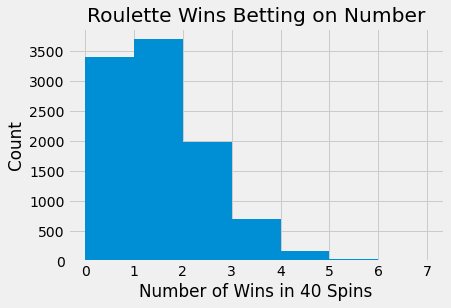

In [6]:
wins = np.array([])
for _ in np.arange(10000):
    wins = np.append(wins,simulate(40))
plt.hist(wins,bins=np.arange(0,8))
plt.xlabel('Number of Wins in 40 Spins')
plt.ylabel('Count')
plt.title('Roulette Wins Betting on Number')

**Question 4.** In the cell below, calculate the proportion of simulations for which you get 7 wins or more. Do your simulations suggest that the customer is cheating?

*Write your answer here, replacing this text.* 

In [7]:
(wins>=7).sum() / len(wins)
# yes, our simulations suggest that it is highly unlikely that the customer could get 7 or more wins in 40 spins

0.0

**Question 5.**  Using a 10,000 trial simulation, generate a histogram of the empirical distribution of the net winnings/gain in 40 games (in each simulation of 40 games, you can calculate the net gain, which can be negative). Using the results of your 10,000 trial simulation, estimate the expected gain in 40 games.

-200.994


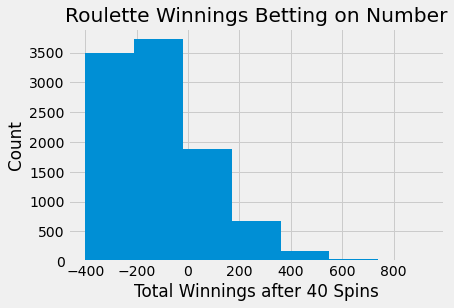

In [8]:
winnings = np.array([])
for _ in np.arange(10000):
    num_wins = simulate(40)
    winnings = np.append(winnings, num_wins*180 + (40-num_wins) * -10)
plt.hist(winnings,bins=7)
plt.xlabel('Total Winnings after 40 Spins')
plt.ylabel('Count')
plt.title('Roulette Winnings Betting on Number')
print(winnings.mean())

## 2.  Sampling the 311 calls database (15 points)

This database is a subset of the City of Chicago "311 Service Requests" dataset,  downloaded from the City of Chicago Data Portal.  It contains the logs of more than 152,000 calls to the City of Chicago non-emergency hotline in January 2020.  

https://data.cityofchicago.org/Service-Requests/311-Service-Requests/v6vf-nfxy


In [9]:
calls = pd.read_csv("data/311_Service_Requests_Jan2020.csv")
print(calls.shape)
calls.head()

(152217, 38)


C:\Users\matth\AppData\Local\Temp\ipykernel_29588\4019626027.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  calls = pd.read_csv("data/311_Service_Requests_Jan2020.csv")


,Unnamed: 0,SR_NUMBER,SR_TYPE,SR_SHORT_CODE,OWNER_DEPARTMENT,STATUS,CREATED_DATE,LAST_MODIFIED_DATE,CLOSED_DATE,STREET_ADDRESS,...,PRECINCT,SANITATION_DIVISION_DAYS,CREATED_HOUR,CREATED_DAY_OF_WEEK,CREATED_MONTH,X_COORDINATE,Y_COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,0,SR20-03333992,Traffic Signal Out Complaint,SFB,CDOT - Department of Transportation,Completed,01/16/2020 06:10:02 AM,01/16/2020 10:32:04 AM,01/16/2020 09:31:54 AM,NaN,...,NaN,NaN,6,5,1,NaN,NaN,NaN,NaN,NaN
1,84,SR20-03334532,Graffiti Removal Request,GRAF,Streets and Sanitation,Completed,01/16/2020 08:42:33 AM,01/16/2020 01:31:38 PM,01/16/2020 08:42:39 AM,NaN,...,NaN,NaN,8,5,1,NaN,NaN,NaN,NaN,NaN
2,90,SR20-03335498,Graffiti Removal Request,GRAF,Streets and Sanitation,Completed,01/16/2020 10:24:35 AM,01/16/2020 02:31:29 PM,01/16/2020 10:24:48 AM,NaN,...,NaN,NaN,10,5,1,NaN,NaN,NaN,NaN,NaN
3,96,SR20-03335462,Graffiti Removal Request,GRAF,Streets and Sanitation,Completed,01/16/2020 10:23:40 AM,01/16/2020 02:31:09 PM,01/16/2020 10:23:47 AM,NaN,...,NaN,NaN,10,5,1,NaN,NaN,NaN,NaN,NaN
4,109,SR20-03335458,Graffiti Removal Request,GRAF,Streets and Sanitation,Completed,01/16/2020 10:23:40 AM,01/16/2020 02:31:09 PM,01/16/2020 10:23:47 AM,NaN,...,NaN,NaN,10,5,1,NaN,NaN,NaN,NaN,NaN


We are interested in knowing how many calls occur in a handful of categories.  Since some complaints are handled by enforcement personnel (Fly Dumping Complaint, Sanitation Code Violation) and some by maintenance crews (Sign Repair Request,Pothole in Street Complaint,  Tree Trim Request) we want to estimate the breakdown of the complaint volume.

With 150,000 calls per month, we are hesitant to look at the entire database. We want to explore which of our questions can be answered using samples of the database. 

**Question 1.** Create a data frame called `calls1pct` that contains a sample of 1% of the rows of the `calls` data frame.  How many rows does your sample (data frame) have?

In [10]:
calls1pct = calls.sample(frac=0.01)
calls1pct.shape

(1522, 38)

**Question 2** Using the sample you created, estimate the proportion of calls with SR_TYPE in the following categories:
* Inaccurate Fuel Pump Complaint  
* Ridesharing Complaint
* Restaurant Complaint 
* Alley Light Out Complaint
* Traffic Signal Out Complaint 
* Pavement Cave-In Inspection Request

Using those estimated proportions, what is your prediction for the number of calls (in these categories) for the whole month.

In [11]:
cats = ['Inaccurate Fuel Pump Complaint','Ridesharing Complaint','Restaurant Complaint','Alley Light Out Complaint',
        'Traffic Signal Out Complaint','Pavement Cave-In Inspection Request']
num_comps = {}
for col in cats:
    num_comps[col] = num_comps.get(col,calls1pct[calls1pct['SR_TYPE']==col].shape[0]/calls1pct.shape[0])
num_comps

{'Inaccurate Fuel Pump Complaint': 0.0,
 'Ridesharing Complaint': 0.0,
 'Restaurant Complaint': 0.001314060446780552,
 'Alley Light Out Complaint': 0.013797634691195795,
 'Traffic Signal Out Complaint': 0.011826544021024968,
 'Pavement Cave-In Inspection Request': 0.0}

In [12]:
for key,val in num_comps.items():
    print(key, val*calls.shape[0])

Inaccurate Fuel Pump Complaint 0.0
Ridesharing Complaint 0.0
Restaurant Complaint 200.02233902759528
Alley Light Out Complaint 2100.23455978975
Traffic Signal Out Complaint 1800.2010512483575
Pavement Cave-In Inspection Request 0.0


**Question 3**  Find the actual numbers of complaints in the above categories for the entire month and compare to the estimates from the 1/100 sample. Which categories were you able to estimate well, and which  categories are estimated poorly?

In [13]:
cats = ['Inaccurate Fuel Pump Complaint','Ridesharing Complaint','Restaurant Complaint','Alley Light Out Complaint',
        'Traffic Signal Out Complaint','Pavement Cave-In Inspection Request']
num_comps = {}
for col in cats:
    num_comps[col] = num_comps.get(col,calls[calls['SR_TYPE']==col].shape[0])
num_comps

{'Inaccurate Fuel Pump Complaint': 6,
 'Ridesharing Complaint': 27,
 'Restaurant Complaint': 223,
 'Alley Light Out Complaint': 2368,
 'Traffic Signal Out Complaint': 2314,
 'Pavement Cave-In Inspection Request': 4}

We estimated Inaccurate Fuel Pump Complaint, Alley Light Out Complaint, Traffic Signal Out Complaint, and Pavement Cave-In Inspection Request fairly well. We did not estimate Ridesharing Complaint or Restaurant Complaint well.

**Question 4.**  What is the largest category (of all the SR_TYPEs) that is present in the full dataset but is missing entirely from your sample? (In other words, of all the categories with 0 counts in your sample, which one has the largest number of rows in the dataset for the entire month?)

In [14]:
insample = calls1pct['SR_TYPE'].unique().tolist()

In [15]:
len(calls1pct['SR_TYPE'].unique().tolist())

52

In [16]:
len(calls['SR_TYPE'].unique().tolist())

89

In [17]:
calls[~calls['SR_TYPE'].isin(insample)]['SR_TYPE'].value_counts()

Sign Repair Request - One Way Sign                       160
Yard Waste Pick-Up Request                               136
Low Water Pressure Complaint                             126
Open Fire Hydrant Complaint                              117
Street Light On During Day Complaint                     109
Lead Inspection Request                                   98
Business Complaints / Reopening Issue                     91
Alley Sewer Inspection Request                            89
Water Quality Concern                                     61
Wire Basket Request                                       59
Sign Repair Request - Do Not Enter Sign                   45
Home Buyer Program Info Request                           40
Public Vehicle/Valet Complaint                            31
Liquor Establishment Complaint                            30
Cable TV Complaint                                        29
Ridesharing Complaint                                     27
Shared Housing/Vacation 

In [18]:
# Sign Repair Request - One Way Sign

**Question 5**. What is the smallest nonzero number of counts for SR_TYPE categories in your sample?  How many categories have this count number?  How many rows do these categories have in the full dataset?

In [19]:
calls1pct['SR_TYPE'].value_counts() # Smallest nonzero number of counts is 1

311 INFORMATION ONLY CALL                        567
Aircraft Noise Complaint                         330
Graffiti Removal Request                         100
Street Light Out Complaint                        82
Pothole in Street Complaint                       58
Garbage Cart Maintenance                          40
Rodent Baiting/Rat Complaint                      34
Abandoned Vehicle Complaint                       30
Snow – Uncleared Sidewalk Complaint               27
Sign Repair Request - All Other Signs             24
Building Violation                                23
Alley Light Out Complaint                         21
Traffic Signal Out Complaint                      18
Stray Animal Complaint                            15
Coyote Interaction Complaint                      14
Sidewalk Inspection Request                       10
Tree Debris Clean-Up Request                      10
Tree Trim Request                                  9
Sewer Cleaning Inspection Request             

In [30]:
nonzero = ['Viaduct Light Out Complaint','Vacant/Abandoned Building Complaint','Snow - Object/Dibs Removal Request',
 'Tree Planting Request','No Water Complaint','Street Light Pole Door Missing Complaint',
 'Consumer Retail Store Complaint','Porch Inspection Request','Bicycle Request/Complaint']

In [33]:
len(nonzero) # 9 categories only occur once in sample

9

In [32]:
for col in nonzero:
    print(col,':',calls[calls['SR_TYPE'] == col].shape[0])

Viaduct Light Out Complaint : 71
Vacant/Abandoned Building Complaint : 345
Snow - Object/Dibs Removal Request : 98
Tree Planting Request : 247
No Water Complaint : 260
Street Light Pole Door Missing Complaint : 50
Consumer Retail Store Complaint : 46
Porch Inspection Request : 44
Bicycle Request/Complaint : 39


## 3. Causes of Death by Year (23 points)


This exercise is designed to give you practice working with dataframes `pivot_table()` and `merge()`. 

We'll be looking at a dataset from the California Department of Public Health that records the cause of death, as recorded on a death certificate, for everyone who died in California from 1999 to 2013.  The data is in the file `causes_of_death.csv.zip`. Each row records the number of deaths by a specific cause in one year in one ZIP code.

To make the file smaller, we've compressed it; run the next cell to unzip and load it.

In [20]:
#!unzip -o causes_of_death.csv.zip
causes = pd.read_csv('data/causes_of_death.csv')
causes.head()

,Year,ZIP Code,Cause of Death,Count,Location
0,1999,90002,SUI,1,"(33.94969, -118.246213)"
1,1999,90005,HOM,1,"(34.058508, -118.301197)"
2,1999,90006,ALZ,1,"(34.049323, -118.291687)"
3,1999,90007,ALZ,1,"(34.029442, -118.287095)"
4,1999,90009,DIA,1,"(33.9452, -118.3832)"


**Question 1 (5 points)** Create a dataframe with two columns, one for Cause of Death and the other contaning a count of the total number of deaths in the dataset due to that cause.  Call the dataframe `cause_count`.

*Hint 1:* If all of your causes have the exact same count, then you probably have done something wrong.

*Hint 2:* You may need to use reset_index() to get a column named "Cause of Death" rather than it being the index.

In [21]:
#replace the ...
cause_count = causes.groupby('Cause of Death',as_index=False)['Count'].sum()
cause_count

,Cause of Death,Count
0,ALZ,111178
1,CAN,822906
2,CLD,194961
3,DIA,106960
4,HOM,21336
5,HTD,957108
6,HYP,41251
7,INJ,157313
8,LIV,60526
9,NEP,14338


The causes of death in the data are abbreviated.  We've provided a file called `abbreviations.csv` to decode the abbreviations.

In [22]:
abbreviations = pd.read_csv('data/abbreviations.csv')
abbreviations

,Cause of Death,Cause of Death (Full Description)
0,AID,Acquired Immune Deficiency Syndrome (AIDS)
1,ALZ,Alzheimer's Disease
2,CAN,Malignant Neoplasms (Cancers)
3,CLD,Chronic Lower Respiratory Disease (CLRD)
4,CPD,Chronic Obstructive Pulmonary Disease (COPD)
5,DIA,Diabetes Mellitus
6,HIV,Human Immunodeficiency Virus Disease (HIVD)
7,HOM,Homicide
8,HTD,Diseases of the Heart
9,HYP,Essential Hypertension and Hypertensive Renal ...


**Question 2. (5 points)** Use the `abbreviations` dataframe to create a dataframe called `full_cause_count` that has the same two columns as `cause_count`, but that has the cause abreviations replaced by their full names.  To get full credit, the two columns should appear in the same order and have the same names as in the original `cause_count` dataframe. 

In [23]:
#You may need a few lines of code to do this in addition to replacing the ...
full_cause_count = cause_count.join(abbreviations.set_index('Cause of Death'), on='Cause of Death')
full_cause_count = full_cause_count[['Cause of Death (Full Description)','Count']]
full_cause_count.rename(columns = {'Cause of Death (Full Description)':'Cause of Death'}, inplace=True)
full_cause_count

,Cause of Death,Count
0,Alzheimer's Disease,111178
1,Malignant Neoplasms (Cancers),822906
2,Chronic Lower Respiratory Disease (CLRD),194961
3,Diabetes Mellitus,106960
4,Homicide,21336
5,Diseases of the Heart,957108
6,Essential Hypertension and Hypertensive Renal ...,41251
7,Unintentional Injuries,157313
8,Chronic Liver Disease and Cirrhosis,60526
9,Kidney Disease (Nephritis),14338


**Question 3.** Several of the causes in the abbreviations dataframe do not appear in `full_cause_count`.   Which ones are missing and why don't they appear in `full_cause_count` (even with, say, some sort of default value or `NaN` for `Count sum`)?

In [24]:
a = abbreviations.join(cause_count.set_index('Cause of Death'), on='Cause of Death')
a[pd.isnull(a['Count'])]

,Cause of Death,Cause of Death (Full Description),Count
0,AID,Acquired Immune Deficiency Syndrome (AIDS),NaN
4,CPD,Chronic Obstructive Pulmonary Disease (COPD),NaN
6,HIV,Human Immunodeficiency Virus Disease (HIVD),NaN


AID, CPD, and HIV. This is because we use left join so that we only get the full descriptions for the abbreviations present in the `cause_count` dataframe.

#### We wish to examine the changes in causes of death over time.  To make a plot of those numbers, we would like to have a dataframe with one row per year, and the information about all the causes of death for each year.

**Question 4. (4 points)** Create a dataframe with **one row for each year** and **a column for each cause of death**, where each cell contains the number of deaths by that cause in that year. Call the dataframe `causes_by_year`.  *Note*: For this dataframe it is best to use the original `causes` dataframe (the one with abreviations) so that it fits on the screen.

In [25]:
causes_by_year = pd.pivot_table(causes, values = 'Count', index = 'Year', columns = 'Cause of Death', aggfunc=np.sum)
causes_by_year

Cause of Death,ALZ,CAN,CLD,DIA,HOM,HTD,HYP,INJ,LIV,NEP,OTH,PNF,STK,SUI
Year,,,,,,,,,,,,,,
1999,3934,52880,13187,6004,2042,69900,0,8940,3546,0,38392,8014,18079,3047
2000,4398,53005,12754,6203,2084,68533,0,8814,3673,0,39259,8355,18090,3113
2001,4897,53810,13056,6457,2301,69004,2348,9274,3759,0,38383,8167,18078,3256
2002,5405,53926,12643,6783,2459,68387,0,9882,3725,0,41177,8098,17551,3210
2003,6585,54307,13380,7088,2481,69013,2578,10470,3832,0,40325,8184,17686,3396
2004,6962,53708,12519,7119,2489,65002,2860,10614,3686,0,39926,7331,16884,3364
2005,7694,54606,13166,7679,2528,64684,3030,10924,3819,0,41791,7537,15550,3188
2006,8141,54043,12807,7367,2596,64648,3187,11236,3826,0,42965,7329,15011,3296
2007,8495,54918,12497,7395,2356,62220,3189,11426,4052,0,43130,6522,13724,3543


**Question 5.** Looking at the `causes_by_year` dataframe, it appears that three of the causes have missing data in several years.   Create a new dataframe `cleaned_causes_by_year` that has these three columns removed.  Your result should have 12 columns (not counting the `Year` index).

In [26]:
#replace the ...
cleaned_causes_by_year = causes_by_year.drop(labels=['HOM','HYP','NEP'],axis=1)
cleaned_causes_by_year

Cause of Death,ALZ,CAN,CLD,DIA,HTD,INJ,LIV,OTH,PNF,STK,SUI
Year,,,,,,,,,,,
1999,3934,52880,13187,6004,69900,8940,3546,38392,8014,18079,3047
2000,4398,53005,12754,6203,68533,8814,3673,39259,8355,18090,3113
2001,4897,53810,13056,6457,69004,9274,3759,38383,8167,18078,3256
2002,5405,53926,12643,6783,68387,9882,3725,41177,8098,17551,3210
2003,6585,54307,13380,7088,69013,10470,3832,40325,8184,17686,3396
2004,6962,53708,12519,7119,65002,10614,3686,39926,7331,16884,3364
2005,7694,54606,13166,7679,64684,10924,3819,41791,7537,15550,3188
2006,8141,54043,12807,7367,64648,11236,3826,42965,7329,15011,3296
2007,8495,54918,12497,7395,62220,11426,4052,43130,6522,13724,3543


**Question 6:**  Draw a line graph to display the numbers of deaths from Stroke (STK), Chronic Liver Desease (CLD), Heart Disease(HTD) and Cancer (CAN) over the 14 years covered by this dataset. **Briefly, what is happening with the death rates from these causes?**


The death rates from these causes are falling for Stroke and Heart Disease while Chronic Liver Disease stays roughly the same.

Text(0.5, 1.0, 'Trends in Cause of Death')

<Figure size 432x288 with 0 Axes>

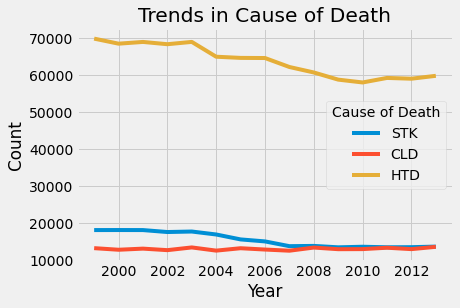

In [27]:
plt.figure()
cleaned_causes_by_year[['STK','CLD','HTD']].plot()
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Trends in Cause of Death')